## Who is your celebrity look alike?

####**Designed by Joon Son Chung, September 2020**

The goal of today's assignment is to familiarise yourself with Pytorch through an application of deep learning.

In doing so, you will find your celebrity look alike.

You should spend a maximum of 90 minutes on this work.


You need to run the following scripts step by step.

First, locate the directory where you put the assignment folder and assign it to `FOLDER`. The script will throw an error if it is not the right folder.

In [2]:
from google.colab import drive
from zipfile import ZipFile
import os, glob, sys

drive.mount('/content/drive', force_remount=True)

# path relative to the home folder of Drive
FOLDER = 'face_recognition' ##### FILL THIS IN #####

assert os.path.exists(os.path.join('/content/drive/My Drive/',FOLDER,'models')), "[!] Enter valid path to the assignment."

os.chdir(os.path.join('/content/drive/My Drive/',FOLDER))

print('Extracting LFW images')

with ZipFile('lfw_cropped.zip', 'r') as zipObj:
  zipObj.extractall('/content')

print('Extraction complete')

Mounted at /content/drive
Extracting LFW images
Extraction complete


Now, load the model. In PyTorch, you need to load model definitions and weights separately. **You do not need to change this section**.

In [3]:
!pwd
sys.path.append('.')
import torch
import cv2
import models.resnet as ResNet
from detectors import S3FD

# Load the network
model = ResNet.resnet50(num_classes=8631, include_top=False).cuda()
weights = torch.load('models/model.pt')
model.load_state_dict(weights)
model.eval()
print('Model loaded')

# Load the face detector (you can ignore this part)
DET = S3FD(device='cuda')

/content/drive/My Drive/face_recognition
Model loaded
[S3FD] loading with cuda
[S3FD] finished loading (0.2895 sec)


### Example

The image reader loads JPEG files into Numpy. You do not need to understand the inner workings of the loader. You need to specify `crop=True` and pass the detector as an argument if the image is from the Internet and not yet cropped. If the image has already been cropped, you do not need to do this. 

In [4]:
sys.path.append('utils')
from image_reader import image_reader

# Load and crop original images
image1 = image_reader('obama.jpg',crop=True,detector=DET)
image2 = image_reader('trump.jpg',crop=True,detector=DET)

# Load already cropped image
image3 = image_reader('cropped_obama.jpg',crop=False)

print('Images loaded as Tensors.')

Images loaded as Tensors.


Then, the next task is to extract features using the pre-trained network.

In [5]:
with torch.no_grad():
  feature1 = model(image1.cuda())
  feature2 = model(image2.cuda())
  feature3 = model(image3.cuda())

print('The feature is of the shape',feature1.size())

print('Similarity between image 1 and 2 is', torch.nn.functional.cosine_similarity(feature1,feature2).item())
print('Similarity between image 1 and 3 is', torch.nn.functional.cosine_similarity(feature1,feature3).item())

The feature is of the shape torch.Size([1, 2048, 1, 1])
Similarity between image 1 and 2 is 0.2950877547264099
Similarity between image 1 and 3 is 0.5614452958106995


We need to get a list of files in LFW.

In [6]:
# glob.glob returns a list of paths matching a file name pattern.
files = glob.glob('/content/lfw_cropped/*/*.jpg')
print('%d files found.'%(len(files)))

Getting the list of files in LFW. This may take a while.
1025 files found.


### Task for you

Now, this is the task for you. Go through all images in `files`. **The images in LFW are already cropped.** Find the face image that is closest to Obama's face in **obama.jpg** (`feature1` above). This might take one or two minutes to run.



Hint: see the documentation for `torch.argmax`.

In [21]:
scores = torch.zeros(len(files))

##### FIND INDEX OF THE FILE WITH THE HIGHEST SIMILARITY
  

torch.Size([1025])


Let's see the closest face to Obama's. If your implementation is the same as mine, you should see `The closest image is /content/lfw_cropped/Cuba_Gooding_Jr/Cuba_Gooding_Jr_0001.jpg with score 0.523.`

The closest image is /content/lfw_cropped/Cuba_Gooding_Jr/Cuba_Gooding_Jr_0001.jpg with score 0.523.


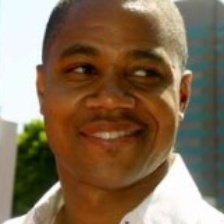

In [23]:
print('The closest image is %s with score %.3f.'%(files[minidx],scores[minidx]))

from IPython.display import Image
Image(filename=files[midx]) 

Now, upload your face image (or somebody else's face if you prefer) to your Google Drive and find the closest match in the database. 

In [ ]:
##### LOAD YOUR IMAGE WITH CROPPING ENABLED

##### OBTAIN FEATURES 

##### ITERATE THROUGH THE LFW DATASET AND FIND THE CLOSEST MATCH

**Strictly optional.** you still have time? Make a small dataset (20-50 images) of Korean celebrities and upload it to Google Drive. Find the image that looks the most like you.

In [ ]:
##### THIS IS UP TO YOU